#  Telco Customer Churn Analysis and Prediction

By Michelle Wan

## Objective:

The goal of this project is to help understand the factors that contribute to customer churn for Telco and to create a customer churn model that predicts whether a customer will churn. Propose recommendations, based on insights, to increase customer retention and reduce churn rate. 

## Dataset Description:

The dataset reflects customer data from a telecom company. This dataset is available via Kaggle.

Key Data Fields:
* CustomerID: Unique identifier for the customer
* Gender: Customer gender (Male, Female)
* Senior Citizen: Whether a customer is a senior (0 for no, 1 for yes)
* Partner: Whether the customer has a partner
* Dependents: Whether the customer has dependents
* Tenure: Number of months the customer has stayed with the company
* MonthlyCharges: The amount charged to the customer monthly
* TotalCharges: The total amount charged to the customer
* Churn: Customer churn status (Yes or No)

## Link to Interactive Tableau Dashboard: https://public.tableau.com/views/customer_churn_telco/Dashboard?:language=en-US&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link

## Summary of Insights

* Telco has difficulty retaining both senior customers and new customers (less than 1 year), with a senior churn rate of 41.68% and a churn rate of 47.68% for new customers.
* Long contracts are more effective for customer retention as nearly all customer churn (88.5% of total customer churn) comes from customers on a month-to-month contract. Increasing contract length decrease churn by over 30% from month-to-month contracts, with two-year contracts having a churn rate of only 2.83%.
* Customers who churn pay on average $15 more at each number of services and have an average tenure time difference of 20 months. This indicates that cost may be a significant factor in the churn rate, as customers who do not churn pay, on median, less than their counterparts.
* Tenureship length increases as the number of services purchased increases, with all customers who purchase 3+ services having a median tenureship of 12 months or more.

## Recommendations and Next Steps

* Promote longer term contracts by offering promotions such as discounted average monthly charge and flexibility in increasing or decreasing services to increase the overall amount of customers on 1-year or 2-year contracts and incentivize them to maintain and renew contracts to full duration.
* Develop senior retention customer programs, targeting the specific customer segment to improve senior churn rate; this can include additional product support for seniors and exclusive offers.
* Reevaluate current pricing schemes, especially for new customers, to mitigate current pricing differences leading to higher churn rate. Offer service bundling and discounts to encourage customers to purchase additional services, reducing their likelihood to churn.
* Continue to evaluate whether certain discount programs are effective in reducing churn, specifically targeting new customers, senior customers, and focusing on conversion from month-to-month to longer term contracts.

## Relevant KPIs
* Reduce churn rate to 30% for new customers and 35% for senior customers within the next fiscal year.
* Achieve a customer retention rate of 80% of all customers within the next year.
* Increase proportion of customers on 1-year or longer contracts to 50%.
* Achieve an average tenure of 1.5 years (18 months) for all customers.

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

## Data Preprocessing

In [2]:
# load dataset

customers = pd.read_csv("telco.csv")

In [3]:
# look at the data

customers.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# amount of observations and features

customers.shape

(7043, 21)

In [5]:
# column/feature names

customers.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
# column data type

customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# Ensure that total charges is also numeric (reflectic a cost).

customers['TotalCharges'] = pd.to_numeric(customers['TotalCharges'], errors='coerce')

In [8]:
# check to see if there are any NAs

customers.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
# To deal with the 11 null values in Total Charges column, we replace it with the median of the data column. I chose to use the median to reflect the average spending by customers without being impacted by potential outliers like with using mean.

median = customers['TotalCharges'].median()
customers['TotalCharges'].fillna(median, inplace=True)

In [10]:
# check to see if that was successful

customers.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
# any duplicated IDs (multiple entries)

customers['customerID'].duplicated().any()

False

In [12]:
# We drop the ID column as it will not have any impact as a feature

customers = customers.drop('customerID', axis=1)

In [13]:
customers.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Exploratory Data Analysis

Some preliminary data analysis to better understand the data and the relationships within the data.

In [14]:
# types of columns to explore

num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
cat_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
            'InternetService', 'OnlineSecurity', 'DeviceProtection', 'TechSupport', 'StreamingTV',
            'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

In [15]:
# seperate the data into a churned and unchurned to compare

churned = customers[customers['Churn'] == 'Yes']
unchurned = customers[customers['Churn'] == 'No']

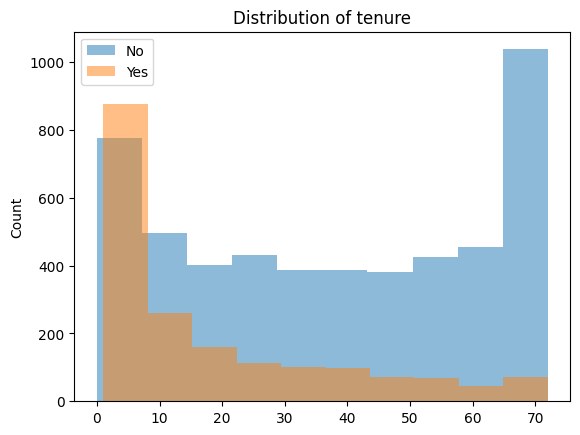

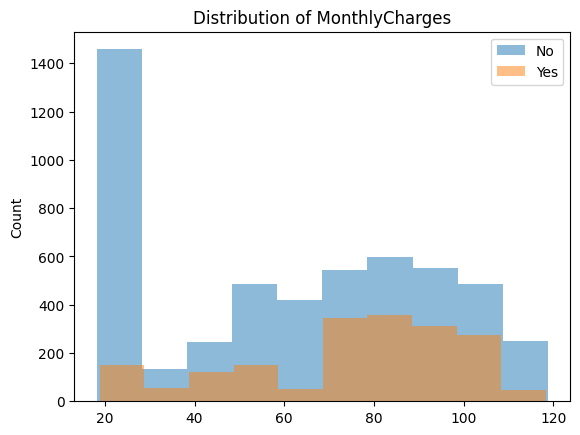

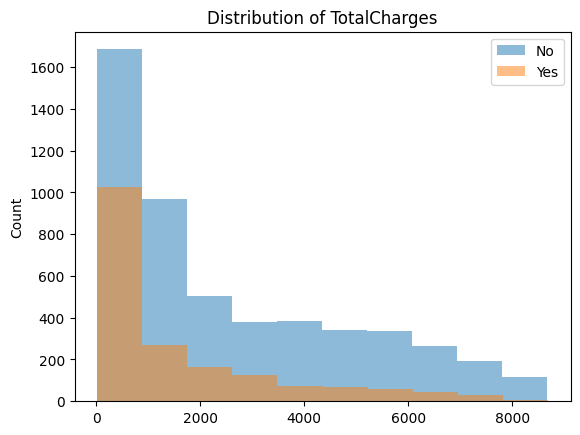

In [16]:
for num in num_cols:
    ax = customers.groupby("Churn")[num].plot.hist(alpha=0.5, legend=True)
    plt.title('Distribution of '+num)
    plt.ylabel('Count')
    plt.show()

The features that is the most relevant and impactful is tenure, where there is a clear difference within churned and non-churned customers. Over 50% of users who have spent less than 10 months with Telco churn, whereas long term customers continue to be loyal.

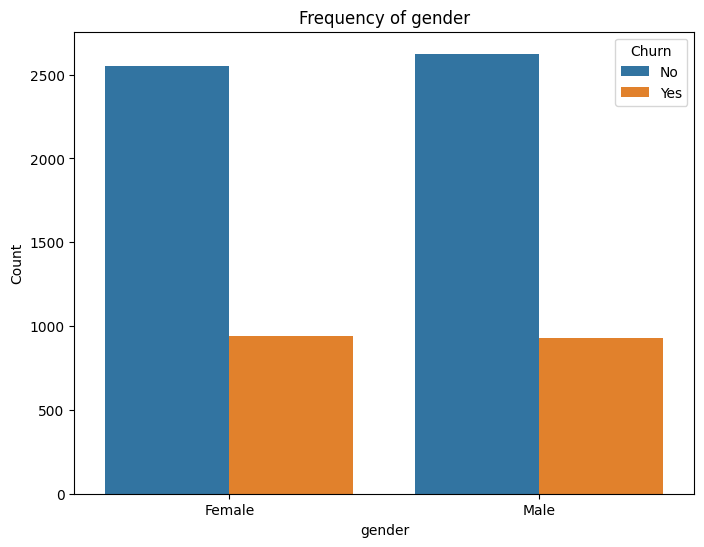

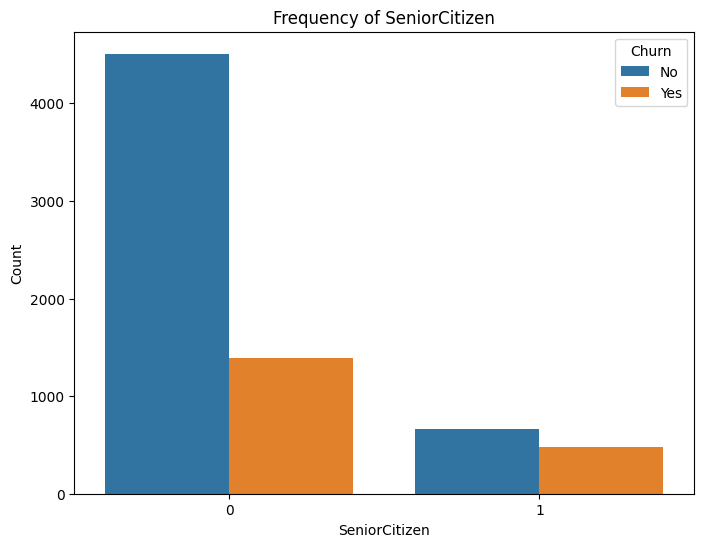

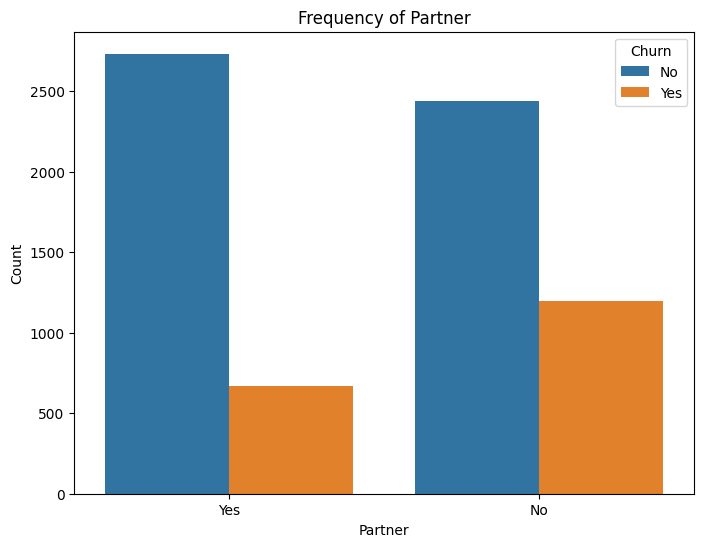

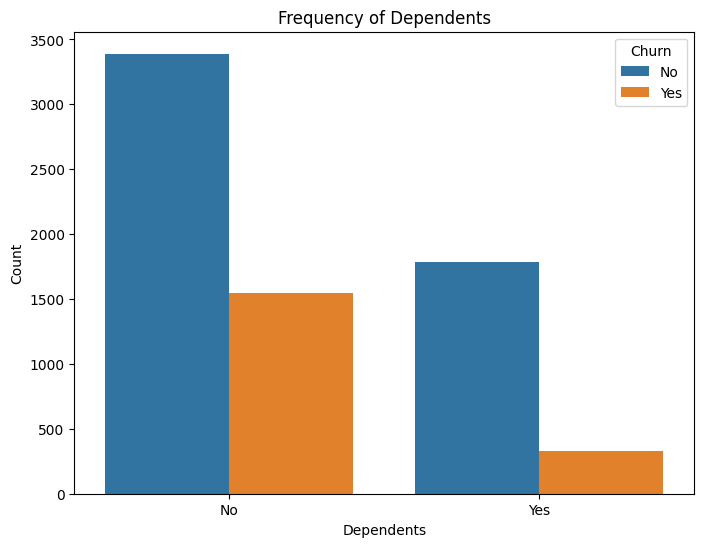

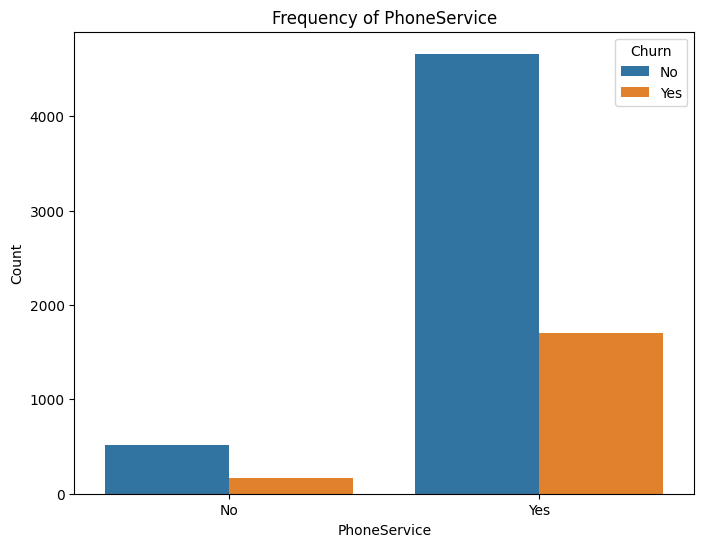

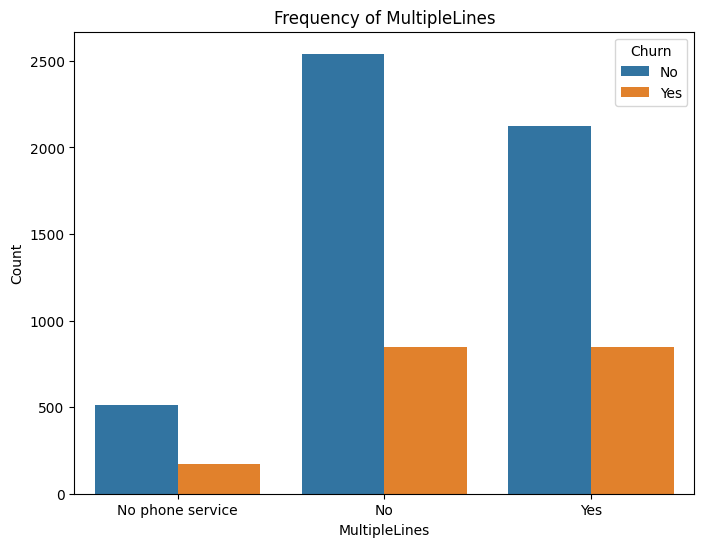

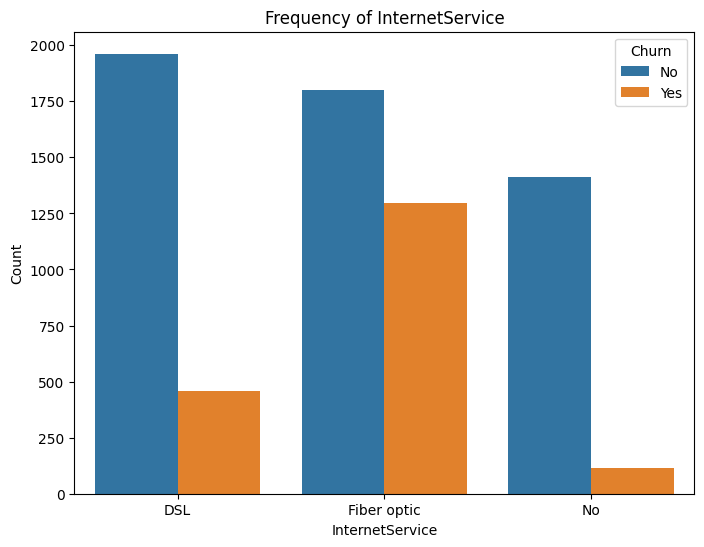

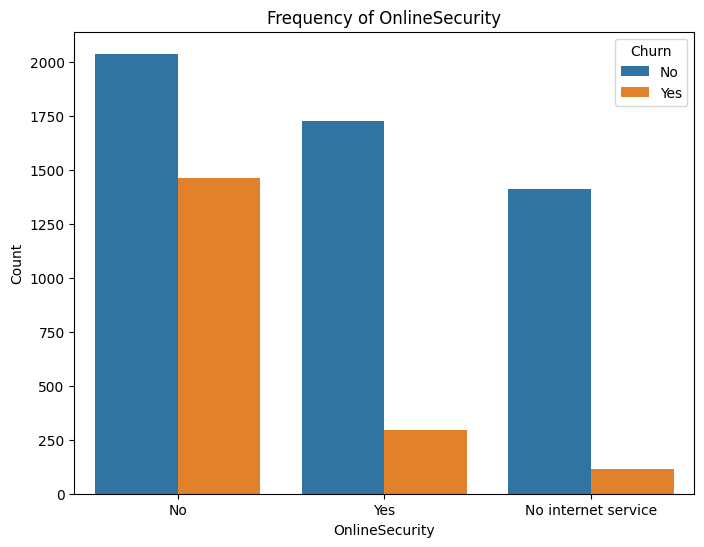

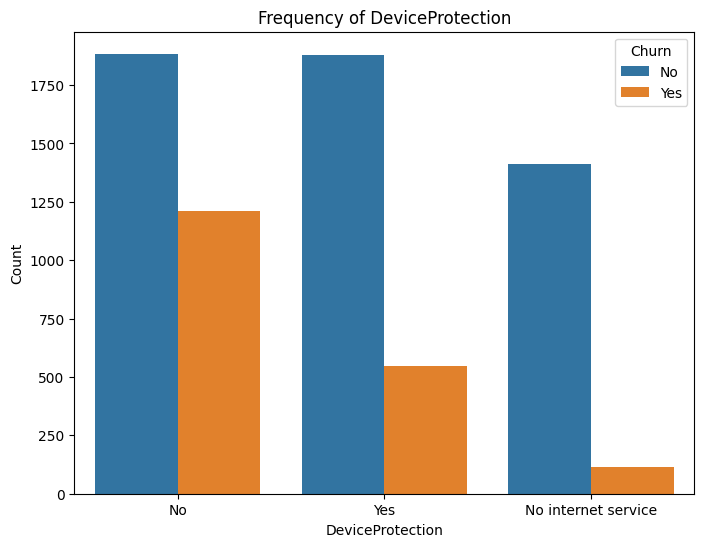

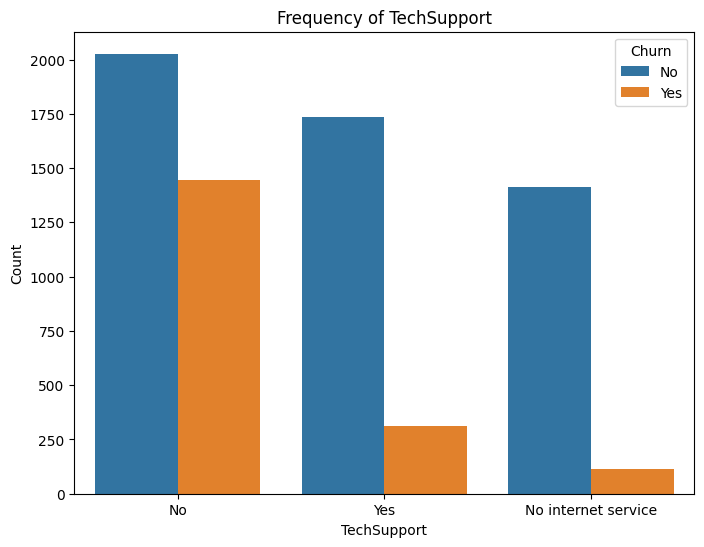

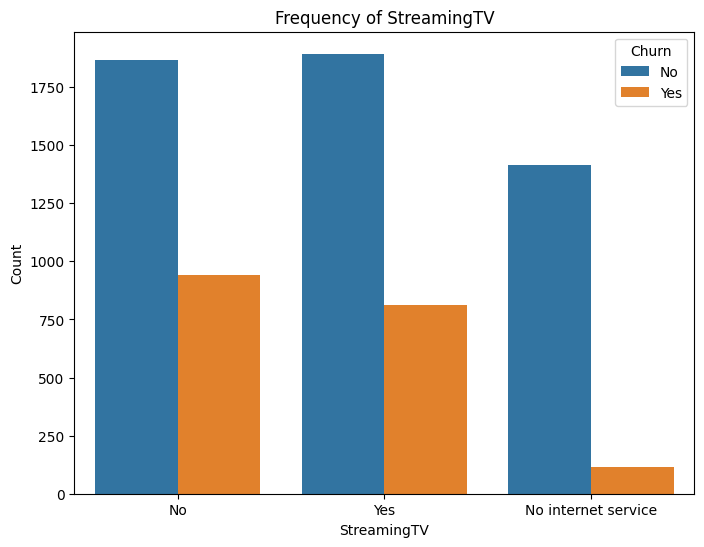

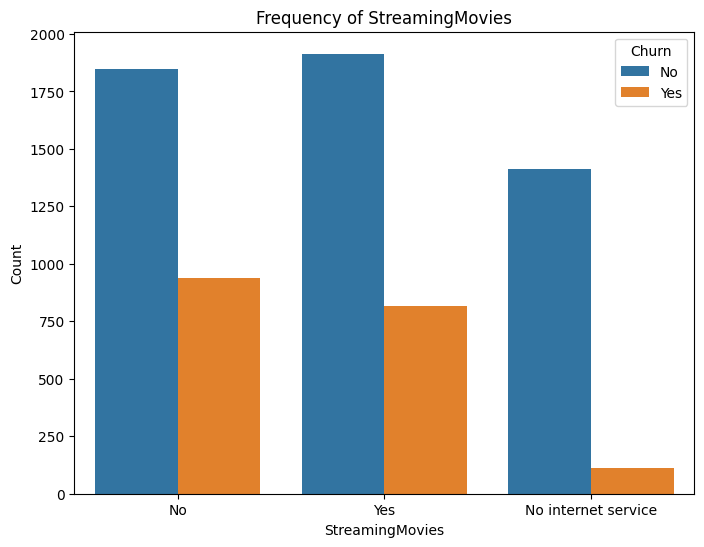

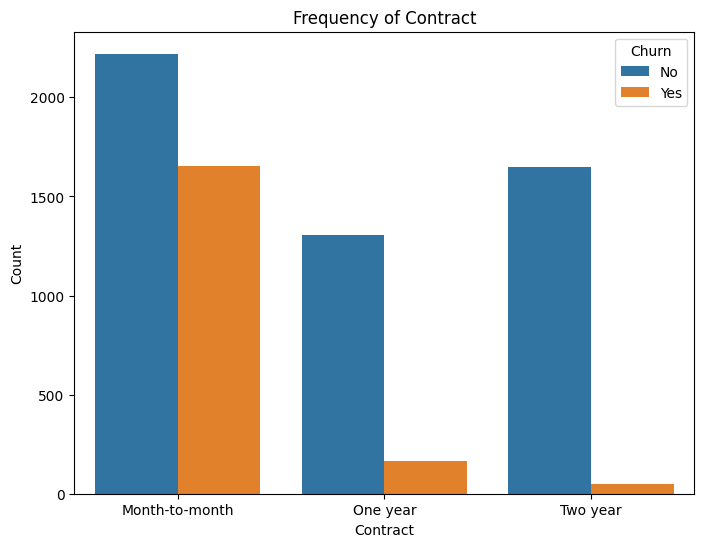

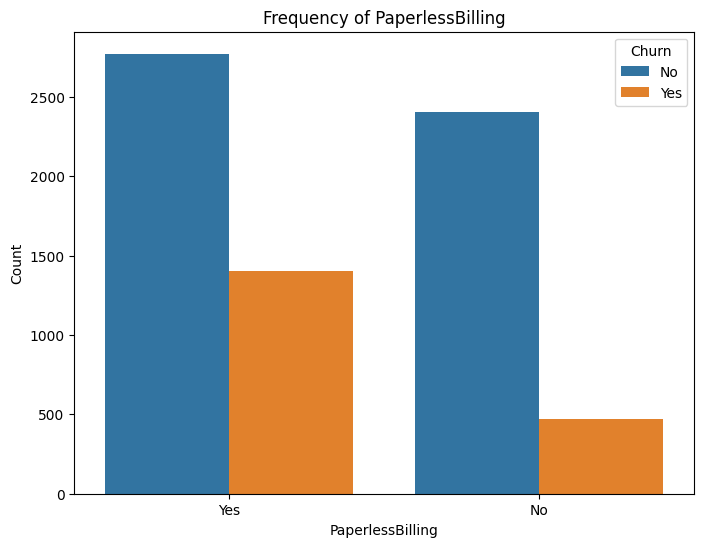

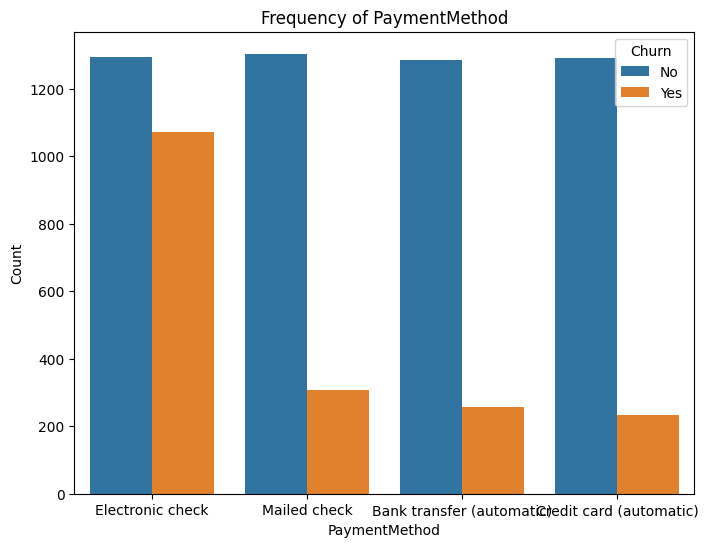

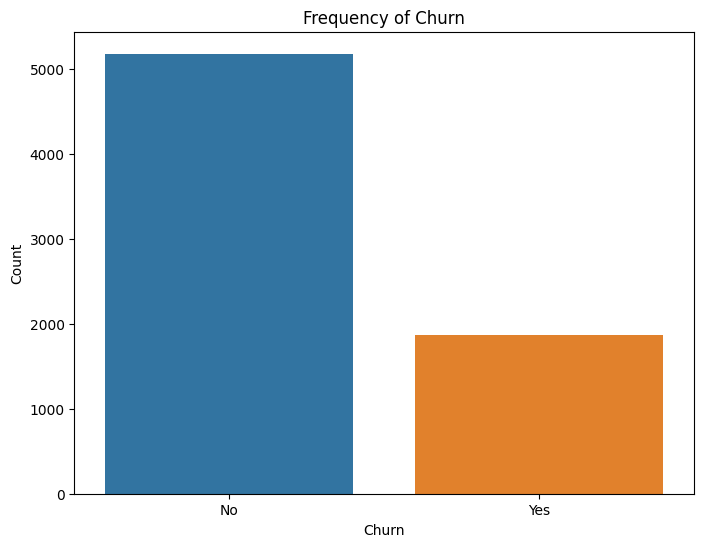

In [17]:
for col in cat_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=customers, hue='Churn')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title('Frequency of '+col)
    plt.show()

From the above columns, we can identify that the data is unbalanced, with more observations being non-churn than churn. Some other key observations we can make are:
* The churn rate of customers renewing their contracts on a monthly basis is much higher than customers with year long or multi-year contracts, this may have to do with consumer loyalty or ease of transfering with longer-term contracts.
* Customers who access tech support are more likely to remain with Telco compared to customers who do not, this may be indicative of good customer service having impacts on the renewal/churn.
* Churn rates for automatic payments are lower, indicating that customers who do not manually make payments may not be as inclined to churn.
* The churn rate for seniors is much higher than for non-seniors.

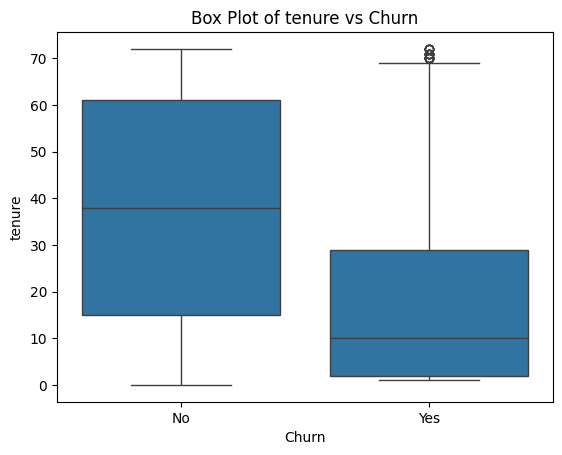

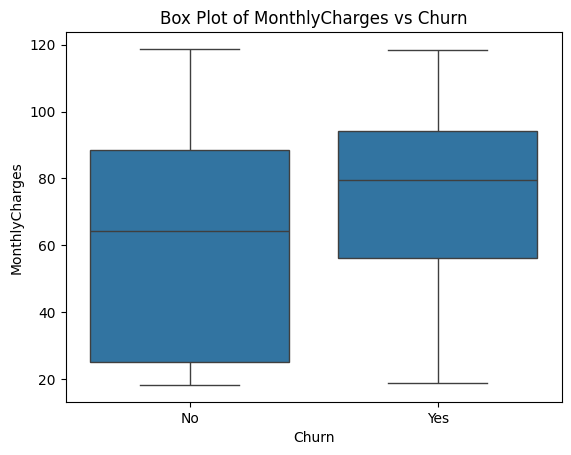

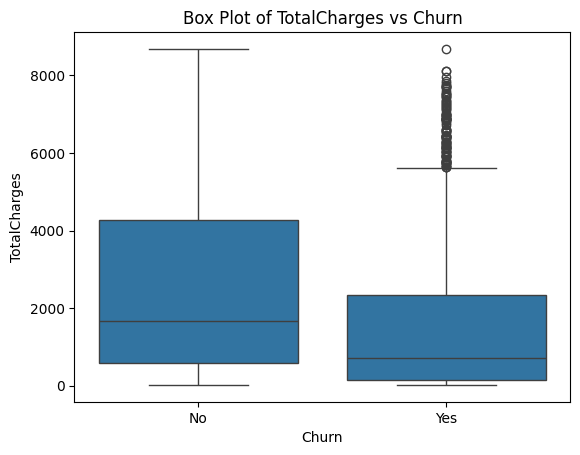

In [18]:
for num in num_cols:
    sns.boxplot(x='Churn', y=num, data=customers)
    plt.title('Box Plot of '+num+' vs Churn')
    plt.show()

* Customers who are with Telco for longer are less likely to churn, likely due to loyalty to the provider.
* Customers who churn are typically paying a higher monthly charge than customers who do not churn, though customers who do not churn also have a wider range of monthly charge amounts.
* Total charges does not seem significant in determining churn.

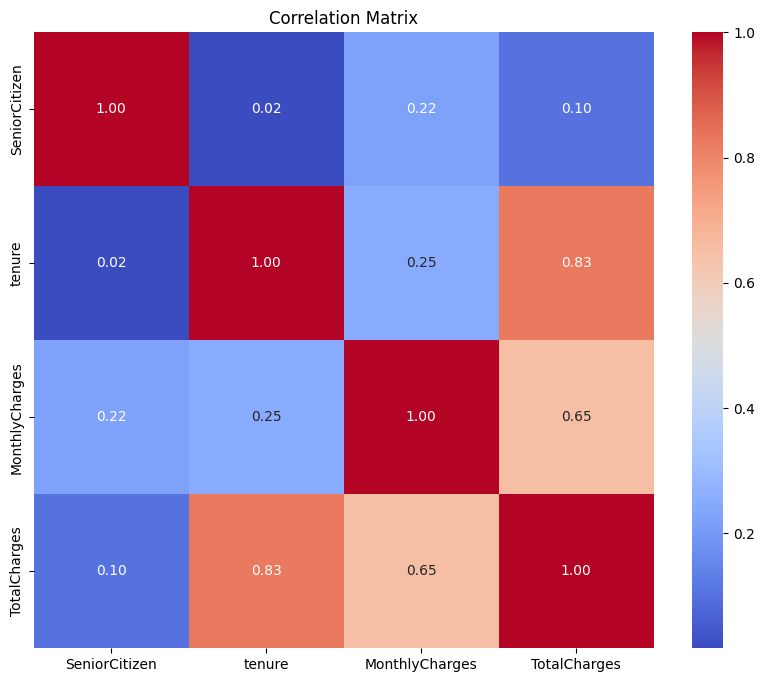

In [19]:
# correlation matrix

numeric = customers.select_dtypes(include=['number'])

correlation_matrix = numeric.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## Feature Engineering

I now look to create new features based on the analysis I have done so far, I will also drop/select features for modelling based on importance.

In [20]:
# New feature to classify the tenureship into bins

bins_label = [0, 12, 24, 36, 48, customers['tenure'].max()]
tenure_length = ['New Customer', 'Short-term Customer', 'Mid-term Customer', 'Long-term Customer', 'Loyal Customer']

customers['CustomerTenure'] = pd.cut(customers['tenure'], bins = bins_label, labels = tenure_length, right = True)

In [21]:
# New feature to count the total amount of services a customer owns

service_cols = ['PhoneService', 'MultipleLines',
            'InternetService', 'OnlineSecurity', 'DeviceProtection', 'TechSupport', 'StreamingTV',
            'StreamingMovies']

def count_yes(value):
    return 1 if value=='Yes' else 0

customers['NumServices'] = customers[service_cols].map(count_yes).sum(axis=1)

In [22]:
# New feature recording the average monthly charge

customers['AverageMonthlyCharge'] = customers['TotalCharges'] / customers['tenure']

In [23]:
# New features indicating if the customer has some of the commonly offered telecommunication bundles

customers['InternetAndPhonePlan'] = (customers['PhoneService'] == 'Yes') & (customers['InternetService'] == 'Yes')
customers['StreamingPlans'] = (customers['StreamingTV'] == 'Yes') & (customers['StreamingMovies'] == 'Yes')
customers['SupportAndSecurityPlan'] = (customers['OnlineSecurity'] == 'Yes') & (customers['DeviceProtection'] == 'Yes') & (customers['TechSupport'] == 'Yes') 

In [24]:
customers.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaymentMethod,MonthlyCharges,TotalCharges,Churn,CustomerTenure,NumServices,AverageMonthlyCharge,InternetAndPhonePlan,StreamingPlans,SupportAndSecurityPlan
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,Electronic check,29.85,29.85,No,New Customer,0,29.850000,False,False,False
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,Mailed check,56.95,1889.50,No,Mid-term Customer,3,55.573529,False,False,False
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,Mailed check,53.85,108.15,Yes,New Customer,2,54.075000,False,False,False
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Bank transfer (automatic),42.30,1840.75,No,Long-term Customer,3,40.905556,False,False,True
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,Electronic check,70.70,151.65,Yes,New Customer,1,75.825000,False,False,False


/var/folders/02/wyd1745509zgpggcrftjxdbw0000gn/T/ipykernel_29682/1954362029.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_group = customers.groupby(['CustomerTenure','Churn']).size().unstack(fill_value=0)


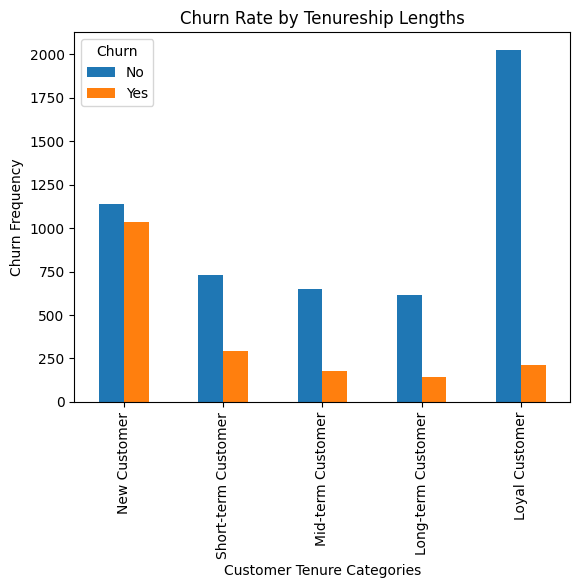

In [25]:
# We can now show churn by the classified tenure group

tenure_group = customers.groupby(['CustomerTenure','Churn']).size().unstack(fill_value=0)

tenure_group.plot(kind='bar', stacked=False)
plt.title('Churn Rate by Tenureship Lengths')
plt.xlabel('Customer Tenure Categories')
plt.ylabel('Churn Frequency')
plt.show()

As we can see, the largest component to focus our efforts on is retaining new customers and converting them into short-term customers (over 1 year with Telco).

In [26]:
# Write dataframe with engineered features into tableau for visualization

customers.to_excel('telco_churn.xlsx', sheet_name='Data')

## Modelling

We firstly want to identify the top 10 features for our model.

In [38]:
from sklearn.preprocessing import LabelEncoder 

# Use label encoder to encode categorical and boolean columns
label_encoders = {}

# handle boolean columns
boolean_cols = customers.select_dtypes(include=[bool]).columns
for col in boolean_cols:
    customers[col] = customers[col].astype(int)

# handle categorical columns
label_cols = customers.select_dtypes(include=['object']).columns 
for col in label_cols:
    le = LabelEncoder()
    customers[col] = le.fit_transform(customers[col].astype(str))  # Convert to string to avoid issues
    label_encoders[col] = le

# drop customer tenure as it is the same as tenure, just binned; drop total charges are we have determined that it is not a good feature through our exploration
X = customers.drop(columns=['Churn', 'CustomerTenure', 'TotalCharges'], axis=1)
y = customers['Churn']

In [39]:
customers.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaymentMethod,MonthlyCharges,TotalCharges,Churn,CustomerTenure,NumServices,AverageMonthlyCharge,InternetAndPhonePlan,StreamingPlans,SupportAndSecurityPlan
0,0,0,1,0,1,0,1,0,0,2,...,2,29.85,29.85,0,New Customer,0,29.850000,0,0,0
1,1,0,0,0,34,1,0,0,2,0,...,3,56.95,1889.50,0,Mid-term Customer,3,55.573529,0,0,0
2,1,0,0,0,2,1,0,0,2,2,...,3,53.85,108.15,1,New Customer,2,54.075000,0,0,0
3,1,0,0,0,45,0,1,0,2,0,...,0,42.30,1840.75,0,Long-term Customer,3,40.905556,0,0,1
4,0,0,0,0,2,1,0,1,0,0,...,2,70.70,151.65,1,New Customer,1,75.825000,0,0,0


In [48]:
# Apply Min-Max scaling to numerical columns

numerical_cols = X.select_dtypes(include=['int', 'float']).columns
scaler = MinMaxScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

In [49]:
# Split data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [50]:
# Use RandomForestClassifer to find feature importance

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

importances = model.feature_importances_
feature_names = X.columns

feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

top_features = feature_importances.head(10)
print("Top 10 Features:")
print(top_features)

Top 10 Features:
                 Feature  Importance
4                 tenure    0.185359
19  AverageMonthlyCharge    0.166667
17        MonthlyCharges    0.162414
14              Contract    0.074022
16         PaymentMethod    0.052663
8         OnlineSecurity    0.043814
11           TechSupport    0.038245
18           NumServices    0.035852
0                 gender    0.027564
9           OnlineBackup    0.024859


We now are able to identify our top 10 features that we will use in our model.

In [63]:
selected_features = [
    'tenure',
    'AverageMonthlyCharge',
    'MonthlyCharges',
    'Contract',
    'PaymentMethod',
    'OnlineSecurity',
    'TechSupport',
    'NumServices',
    'gender',
    'OnlineBackup'
]

X = customers[selected_features]
y = customers['Churn']

X.replace([np.inf, -np.inf], np.nan, inplace=True)

for col in X.select_dtypes(include=['int', 'float']).columns:
    mean_value = X[col].mean()
    X[col].fillna(mean_value, inplace=True)

numerical_cols = X.select_dtypes(include=['int', 'float']).columns
scaler = MinMaxScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[684  91]
 [123 159]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       775
           1       0.64      0.56      0.60       282

    accuracy                           0.80      1057
   macro avg       0.74      0.72      0.73      1057
weighted avg       0.79      0.80      0.79      1057



/var/folders/02/wyd1745509zgpggcrftjxdbw0000gn/T/ipykernel_29682/329563313.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace([np.inf, -np.inf], np.nan, inplace=True)
/var/folders/02/wyd1745509zgpggcrftjxdbw0000gn/T/ipykernel_29682/329563313.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col].fillna(mean_value, inplace=True)
/var/folders/02/wyd1745509zgpggcrftjxdbw0000gn/T/ipykernel_29682/329563313.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa